In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.simplefilter(action='ignore', category=Warning)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlx-2-0-regression/sample_submission.csv
/kaggle/input/mlx-2-0-regression/train.csv
/kaggle/input/mlx-2-0-regression/test.csv


# Dataset Exploration and Preprocessing
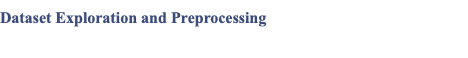
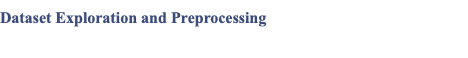
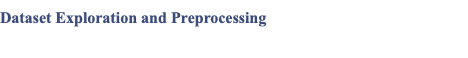
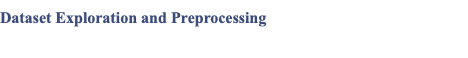

In [7]:
df = pd.read_csv("/kaggle/input/mlx-2-0-regression/train.csv")
test = pd.read_csv("/kaggle/input/mlx-2-0-regression/test.csv")

In [8]:
df

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
0,76339,0.482850,1.169231,80.018,0.020100,Country Stuff (feat. Jake Owen),1.0,0.789,154586.0,NaN,...,4.0,161853.0,7.0,4.0,NaN,0.607,7.0,0.7250,0.000000,74
1,80006,0.267862,1.321321,147.966,0.334000,Solitude,6.0,0.715,46874.0,15.0,...,4.0,155619.0,1.0,4.0,0.843,0.783,4.0,NaN,0.043200,2
2,83501,0.242606,1.285319,142.980,0.111000,BDFFRNT (Saved from Conformity),4.0,NaN,264665.0,7.0,...,4.0,209378.0,6.0,4.0,NaN,0.211,10.0,0.6020,0.000000,35
3,81530,0.426400,1.279435,123.063,0.196000,Headlights (feat. Ilsey),5.0,0.685,209208.0,5.0,...,4.0,219043.0,11.0,4.0,0.702,0.369,NaN,0.8200,0.000335,70
4,60534,0.000000,0.974906,132.722,0.081100,Afraid,6.0,0.856,215346.0,5.0,...,4.0,258893.0,1.0,0.0,0.000,0.631,1.0,0.0221,0.000000,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61604,75677,0.261387,0.809917,90.017,0.510000,Hasret,NaN,0.449,218490.0,43.0,...,4.0,183381.0,0.0,4.0,0.742,0.385,10.0,0.4610,0.000000,16
61605,29591,0.585648,1.185022,122.973,0.512000,NO HALO,NaN,0.573,259746.0,6.0,...,4.0,204533.0,4.0,4.0,0.869,0.470,9.0,0.7470,0.000170,69
61606,62355,0.112203,0.469714,121.045,0.493000,Aloha! - Main Title Theme,10.0,0.526,79093.0,66.0,...,4.0,157426.0,NaN,4.0,0.515,0.573,10.0,0.8190,0.101000,55
61607,88778,0.438699,1.486339,95.390,0.023700,Golden,NaN,0.838,208906.0,9.0,...,4.0,174000.0,4.0,4.0,0.676,0.254,8.0,0.7710,0.000131,88


In [9]:
test

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0
0,25174,0.600480,1.543590,124.008,0.0729,Dr.Q,1.0,0.763,23032.0,4.0,...,0.834,4.0,253987.0,4.0,4.0,0.604,0.2050,0.0,0.720,0.165000
1,38453,NaN,0.722420,129.942,0.0105,Start A Party,11.0,0.801,215466.0,20.0,...,0.216,4.0,267626.0,5.0,4.0,0.881,0.2610,1.0,0.496,0.000000
2,29013,0.461916,0.757962,83.000,0.2700,Sombras - Live,2.0,0.561,252261.0,44.0,...,0.546,4.0,226626.0,0.0,4.0,0.555,0.0555,0.0,0.846,0.002760
3,57463,0.144236,0.923977,183.991,0.1210,Tennis Court,2.0,NaN,198907.0,23.0,...,0.337,4.0,234286.0,0.0,4.0,0.674,0.4040,7.0,0.428,0.000194
4,51264,0.629832,1.473795,201.277,0.0610,La Cumbia Del Lazo,10.0,0.716,158720.0,NaN,...,0.966,4.0,188520.0,8.0,4.0,0.511,0.9620,10.0,0.652,0.000115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41069,13950,0.272556,0.746250,110.001,0.0959,Best 4 U,5.0,0.608,239751.0,23.0,...,0.452,4.0,199849.0,10.0,4.0,0.655,0.3720,8.0,0.603,0.000000
41070,70306,0.434898,0.992874,135.984,0.0956,NaN,7.0,0.722,304290.0,15.0,...,0.666,4.0,368006.0,5.0,4.0,0.722,0.8300,6.0,0.653,0.000398
41071,30767,0.645150,1.551532,85.043,0.0288,Back from the Edge,10.0,0.726,234146.0,18.0,...,0.759,4.0,NaN,7.0,4.0,0.601,0.4740,10.0,0.850,NaN
41072,11188,0.576678,1.596491,79.227,0.2400,Pray For Us,2.0,0.842,59213.0,NaN,...,0.669,4.0,203346.0,5.0,4.0,0.487,0.0869,7.0,0.862,0.000068


In [10]:
duplicates = df[df.duplicated()]
duplicates

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target


In [11]:
describe = pd.DataFrame(index=df.columns.to_list())
describe['data type'] = df.dtypes
describe['count'] = df.count()
describe['unique'] = df.nunique()
describe['null'] = df.isnull().sum()
describe

,data type,count,unique,null
id,int64,61609,61609,0
emotional_charge_2,float64,59167,22602,2442
groove_efficiency_1,float64,61429,23496,180
beat_frequency_1,float64,61223,18500,386
organic_texture_2,float64,61226,3734,383
...,...,...,...,...
emotional_resonance_0,float64,60063,1636,1546
harmonic_scale_2,float64,57142,12,4467
intensity_index_2,float64,60916,1588,693
instrumental_density_0,float64,60900,4360,709


In [12]:
import pandas as pd

pd.set_option('display.max_rows', None)  # Show all rows
print(describe)
pd.reset_option('display.max_rows')      # Optional: reset to default after printing

                           data type  count  unique   null
id                             int64  61609   61609      0
emotional_charge_2           float64  59167   22602   2442
groove_efficiency_1          float64  61429   23496    180
beat_frequency_1             float64  61223   18500    386
organic_texture_2            float64  61226    3734    383
composition_label_0           object  58660   21709   2949
harmonic_scale_1             float64  58304      12   3305
intensity_index_0            float64  55638    1569   5971
duration_ms_0                float64  60320   20082   1289
album_name_length            float64  52015     136   9594
beat_frequency_0             float64  51878   17047   9731
beat_frequency_2             float64  59843   18229   1766
artist_count                 float64  58348      15   3261
composition_label_1           object  60149   22930   1460
publication_timestamp         object  60101    6061   1508
weekday_of_release            object  56551       7   50

In [13]:
column_order = [ 
    'id', 'track_identifier', 'creator_collective', 'publication_timestamp',
    'album_component_count', 'album_name_length', 'artist_count', 
    'weekday_of_release', 'season_of_release', 'lunar_phase',
    
    # Track 0
    'composition_label_0', 'duration_ms_0', 'rhythmic_cohesion_0', 'intensity_index_0',
    'harmonic_scale_0', 'tonal_mode_0', 'organic_texture_0', 'beat_frequency_0',
    'time_signature_0', 'emotional_charge_0', 'groove_efficiency_0',
    'organic_immersion_0', 'performance_authenticity_0', 'instrumental_density_0',
    'vocal_presence_0', 'emotional_resonance_0',

    # Track 1
    'composition_label_1', 'duration_ms_1', 'rhythmic_cohesion_1', 'intensity_index_1',
    'harmonic_scale_1', 'tonal_mode_1', 'organic_texture_1', 'beat_frequency_1',
    'time_signature_1', 'emotional_charge_1', 'groove_efficiency_1',
    'organic_immersion_1', 'performance_authenticity_1', 'instrumental_density_1',
    'vocal_presence_1', 'emotional_resonance_1',

    # Track 2
    'composition_label_2', 'duration_ms_2', 'rhythmic_cohesion_2', 'intensity_index_2',
    'harmonic_scale_2', 'tonal_mode_2', 'organic_texture_2', 'beat_frequency_2',
    'time_signature_2', 'emotional_charge_2', 'groove_efficiency_2',
    'organic_immersion_2', 'performance_authenticity_2', 'instrumental_density_2',
    'vocal_presence_2', 'emotional_resonance_2',

    # Derived
    'duration_consistency', 'tempo_volatility', 'key_variety'
]

# Only add target if it's in the DataFrame (i.e., training data)
if 'target' in df.columns:
    column_order.append('target')

# Reorder DataFrame
df = df[column_order]

In [14]:
df

,id,track_identifier,creator_collective,publication_timestamp,album_component_count,album_name_length,artist_count,weekday_of_release,season_of_release,lunar_phase,...,groove_efficiency_2,organic_immersion_2,performance_authenticity_2,instrumental_density_2,vocal_presence_2,emotional_resonance_2,duration_consistency,tempo_volatility,key_variety,target
0,76339,NaN,"Walker Hayes,",2021-06-04,6.0,NaN,NaN,Friday,summer,waning,...,NaN,0.063601,0.1120,0.000000,0.0322,0.666,15204.423983,82.027,2.0,74
1,80006,BornTo DieAlone,"Zpvrt,",2019-07-01,3.0,15.0,2.0,Monday,summer,waning,...,0.879147,0.686214,0.1720,0.000083,NaN,0.361,45592.954911,22.112,3.0,2
2,83501,BDFFRNT,"Dillon Chase,",2014-11-18,14.0,7.0,2.0,NaN,autumn,full,...,0.912121,0.559969,0.0828,0.000000,0.3280,0.403,38309.603777,18.242,3.0,35
3,81530,Sugar,NaN,2015-09-25,15.0,5.0,2.0,Friday,autumn,full,...,1.166430,0.611278,0.1560,0.000000,0.0630,0.520,13345.980827,NaN,3.0,70
4,60534,Loose,"Nelly Furtado,",2006-01-01,17.0,5.0,2.0,NaN,winter,waxing,...,NaN,0.008668,0.0000,0.000000,0.0000,0.000,110199.561452,132.722,2.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61604,75677,"Aykut Gürel Presents Bergüzar Korel, Vol. 2","Bergüzar Korel,",2020-02-21,10.0,43.0,2.0,Friday,winter,waxing,...,0.620458,2.043672,0.1220,0.000015,0.0255,0.567,23496.831574,NaN,3.0,16
61605,29591,GINGER,"BROCKHAMPTON,",2019-08-23,12.0,6.0,2.0,NaN,summer,waxing,...,0.858621,1.213321,0.1240,0.000000,0.1510,0.784,48023.116399,42.219,3.0,69
61606,62355,The White Lotus (Soundtrack from the HBO® Orig...,"Cristobal Tapia De Veer,",2021-07-11,28.0,66.0,2.0,Sunday,summer,waxing,...,1.587209,NaN,0.1190,0.870000,0.0922,0.137,52381.481480,NaN,2.0,55
61607,88778,Fine Line,"Harry Styles,",2019-12-13,12.0,9.0,2.0,Friday,winter,waning,...,1.138848,0.081818,0.1020,0.000007,0.0483,0.569,16053.272612,44.473,3.0,88


In [15]:
df.iloc[:, 10:26]

,composition_label_0,duration_ms_0,rhythmic_cohesion_0,intensity_index_0,harmonic_scale_0,tonal_mode_0,organic_texture_0,beat_frequency_0,time_signature_0,emotional_charge_0,groove_efficiency_0,organic_immersion_0,performance_authenticity_0,instrumental_density_0,vocal_presence_0,emotional_resonance_0
0,Country Stuff (feat. Jake Owen),154586.0,0.685,0.789,7.0,1.0,0.09900,95.992,4.0,0.478923,1.150146,0.255067,0.3360,0.000000,0.1420,0.607
1,Solitude,46874.0,0.523,0.715,1.0,1.0,0.00758,148.076,4.0,0.559845,NaN,NaN,0.7520,0.043200,0.4760,0.783
2,BDFFRNT (Saved from Conformity),264665.0,NaN,NaN,6.0,0.0,0.44500,124.738,4.0,0.148544,1.270758,1.962932,0.1890,0.000000,0.2890,0.211
3,Headlights (feat. Ilsey),209208.0,0.597,0.685,11.0,1.0,0.02450,NaN,4.0,0.252765,1.145485,0.085427,0.1820,0.000335,0.0367,0.369
4,Afraid,215346.0,0.760,0.856,1.0,0.0,0.11300,118.006,4.0,0.540136,1.124836,0.405568,0.6970,0.000000,0.0430,0.631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61604,Hasret,218490.0,0.648,0.449,0.0,0.0,0.36400,NaN,4.0,0.172865,0.691834,1.325506,0.0878,0.000000,0.0378,0.385
61605,NO HALO,259746.0,NaN,0.573,4.0,1.0,0.41000,165.192,4.0,0.269310,0.889752,NaN,0.0695,0.000170,0.0709,0.470
61606,Aloha! - Main Title Theme,79093.0,0.831,0.526,NaN,1.0,0.57500,121.062,4.0,0.301398,0.632212,0.757975,0.1250,0.101000,0.0812,0.573
61607,Golden,208906.0,0.448,0.838,4.0,0.0,0.21000,139.863,4.0,0.212852,1.866370,0.731171,0.1310,0.000131,0.0557,0.254


In [16]:
df['publication_timestamp'] = pd.to_datetime(df['publication_timestamp'], errors='coerce')

In [17]:
numerical_cols = list(df.select_dtypes(include=["float64", "int64"]).columns)
categorical_cols = list(df.select_dtypes(include=["object"]).columns)
numerical_cols.remove("target")

## Handling missing values

In [18]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

test[numerical_cols] = test[numerical_cols].fillna(df[numerical_cols].mean())
test[categorical_cols] = test[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [19]:
df['is_train'] = True
test['is_train'] = False
test['target'] = np.nan
new_df = pd.concat([df, test], axis=0)

In [20]:
new_df

,id,track_identifier,creator_collective,publication_timestamp,album_component_count,album_name_length,artist_count,weekday_of_release,season_of_release,lunar_phase,...,organic_immersion_2,performance_authenticity_2,instrumental_density_2,vocal_presence_2,emotional_resonance_2,duration_consistency,tempo_volatility,key_variety,target,is_train
0,76339,Certified Lover Boy,"Walker Hayes,",2021-06-04 00:00:00,6.0,18.225723,2.10703,Friday,summer,waning,...,0.063601,0.1120,0.000000,0.032200,0.666,15204.423983,82.02700,2.0,74.0,True
1,80006,BornTo DieAlone,"Zpvrt,",2019-07-01 00:00:00,3.0,15.000000,2.00000,Monday,summer,waning,...,0.686214,0.1720,0.000083,0.121905,0.361,45592.954911,22.11200,3.0,2.0,True
2,83501,BDFFRNT,"Dillon Chase,",2014-11-18 00:00:00,14.0,7.000000,2.00000,Friday,autumn,full,...,0.559969,0.0828,0.000000,0.328000,0.403,38309.603777,18.24200,3.0,35.0,True
3,81530,Sugar,"Various Artists,",2015-09-25 00:00:00,15.0,5.000000,2.00000,Friday,autumn,full,...,0.611278,0.1560,0.000000,0.063000,0.520,13345.980827,46.26782,3.0,70.0,True
4,60534,Loose,"Nelly Furtado,",2006-01-01 00:00:00,17.0,5.000000,2.00000,Friday,winter,waxing,...,0.008668,0.0000,0.000000,0.000000,0.000,110199.561452,132.72200,2.0,78.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41069,13950,Red Pill Blues (Deluxe),"Maroon 5,",2018-06-15,16.0,23.000000,2.00000,Friday,summer,waxing,...,0.304709,0.1070,0.000000,0.055500,0.452,21314.138067,32.77700,3.0,NaN,False
41070,70306,A Toast to Life,"Various Artists,",2021-08-01,13.0,15.000000,2.00000,Sunday,summer,new,...,0.411051,0.1560,0.000000,0.055000,0.666,45104.126562,40.96100,3.0,NaN,False
41071,30767,Certified Lover Boy,"James Arthur,",2016-10-28,17.0,18.000000,2.00000,Friday,autumn,new,...,0.114317,0.1830,0.000000,0.117000,0.759,11752.372016,62.84500,2.0,NaN,False
41072,11188,"God Forgives, I Don't (Deluxe Edition)","Rick Ross,",2012-01-01,17.0,18.225723,2.00000,Sunday,winter,waxing,...,0.958566,0.1540,0.000000,0.333000,0.669,85031.101302,13.23800,3.0,NaN,False


## Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

label_cols = [
    'track_identifier',
    'composition_label_0', 'composition_label_1', 'composition_label_2',
    'harmonic_scale_0', 'harmonic_scale_1', 'harmonic_scale_2', 
    'lunar_phase', 'season_of_release', 'weekday_of_release'
]

for col in label_cols:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col].astype(str))

## Target Encoding

In [22]:
# Calculate mean target on training set only
target_means = new_df[new_df['id'] < 61609].groupby('creator_collective')['target'].mean()
global_mean = new_df[new_df['id'] < 61609]['target'].mean()

# Map to all
new_df['creator_collective'] = new_df['creator_collective'].map(target_means)
new_df['creator_collective'] = new_df['creator_collective'].fillna(global_mean)

In [23]:
# Split back
df = new_df[new_df['is_train']].drop(columns=['is_train']).reset_index(drop=True)
test = new_df[~new_df['is_train']].drop(columns=['is_train', 'target']).reset_index(drop=True)

In [24]:
df

,id,track_identifier,creator_collective,publication_timestamp,album_component_count,album_name_length,artist_count,weekday_of_release,season_of_release,lunar_phase,...,groove_efficiency_2,organic_immersion_2,performance_authenticity_2,instrumental_density_2,vocal_presence_2,emotional_resonance_2,duration_consistency,tempo_volatility,key_variety,target
0,76339,5018,74.000000,2021-06-04 00:00:00,6.0,18.225723,2.10703,0,2,2,...,1.450475,0.063601,0.1120,0.000000,0.032200,0.666,15204.423983,82.02700,2.0,74.0
1,80006,4125,51.996884,2019-07-01 00:00:00,3.0,15.000000,2.00000,1,2,2,...,0.879147,0.686214,0.1720,0.000083,0.121905,0.361,45592.954911,22.11200,3.0,2.0
2,83501,2827,51.996884,2014-11-18 00:00:00,14.0,7.000000,2.00000,0,0,0,...,0.912121,0.559969,0.0828,0.000000,0.328000,0.403,38309.603777,18.24200,3.0,35.0
3,81530,25250,50.549653,2015-09-25 00:00:00,15.0,5.000000,2.00000,0,0,0,...,1.166430,0.611278,0.1560,0.000000,0.063000,0.520,13345.980827,46.26782,3.0,70.0
4,60534,16056,78.000000,2006-01-01 00:00:00,17.0,5.000000,2.00000,0,3,3,...,1.450475,0.008668,0.0000,0.000000,0.000000,0.000,110199.561452,132.72200,2.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61604,75677,2693,51.996884,2020-02-21 00:00:00,10.0,43.000000,2.00000,0,3,3,...,0.620458,2.043672,0.1220,0.000015,0.025500,0.567,23496.831574,46.26782,3.0,16.0
61605,29591,10089,64.576923,2019-08-23 00:00:00,12.0,6.000000,2.00000,0,2,3,...,0.858621,1.213321,0.1240,0.000000,0.151000,0.784,48023.116399,42.21900,3.0,69.0
61606,62355,27479,55.000000,2021-07-11 00:00:00,28.0,66.000000,2.00000,3,2,3,...,1.587209,0.958566,0.1190,0.870000,0.092200,0.137,52381.481480,46.26782,2.0,55.0
61607,88778,9385,84.800000,2019-12-13 00:00:00,12.0,9.000000,2.00000,0,3,2,...,1.138848,0.081818,0.1020,0.000007,0.048300,0.569,16053.272612,44.47300,3.0,88.0


## Correlation Heatmap

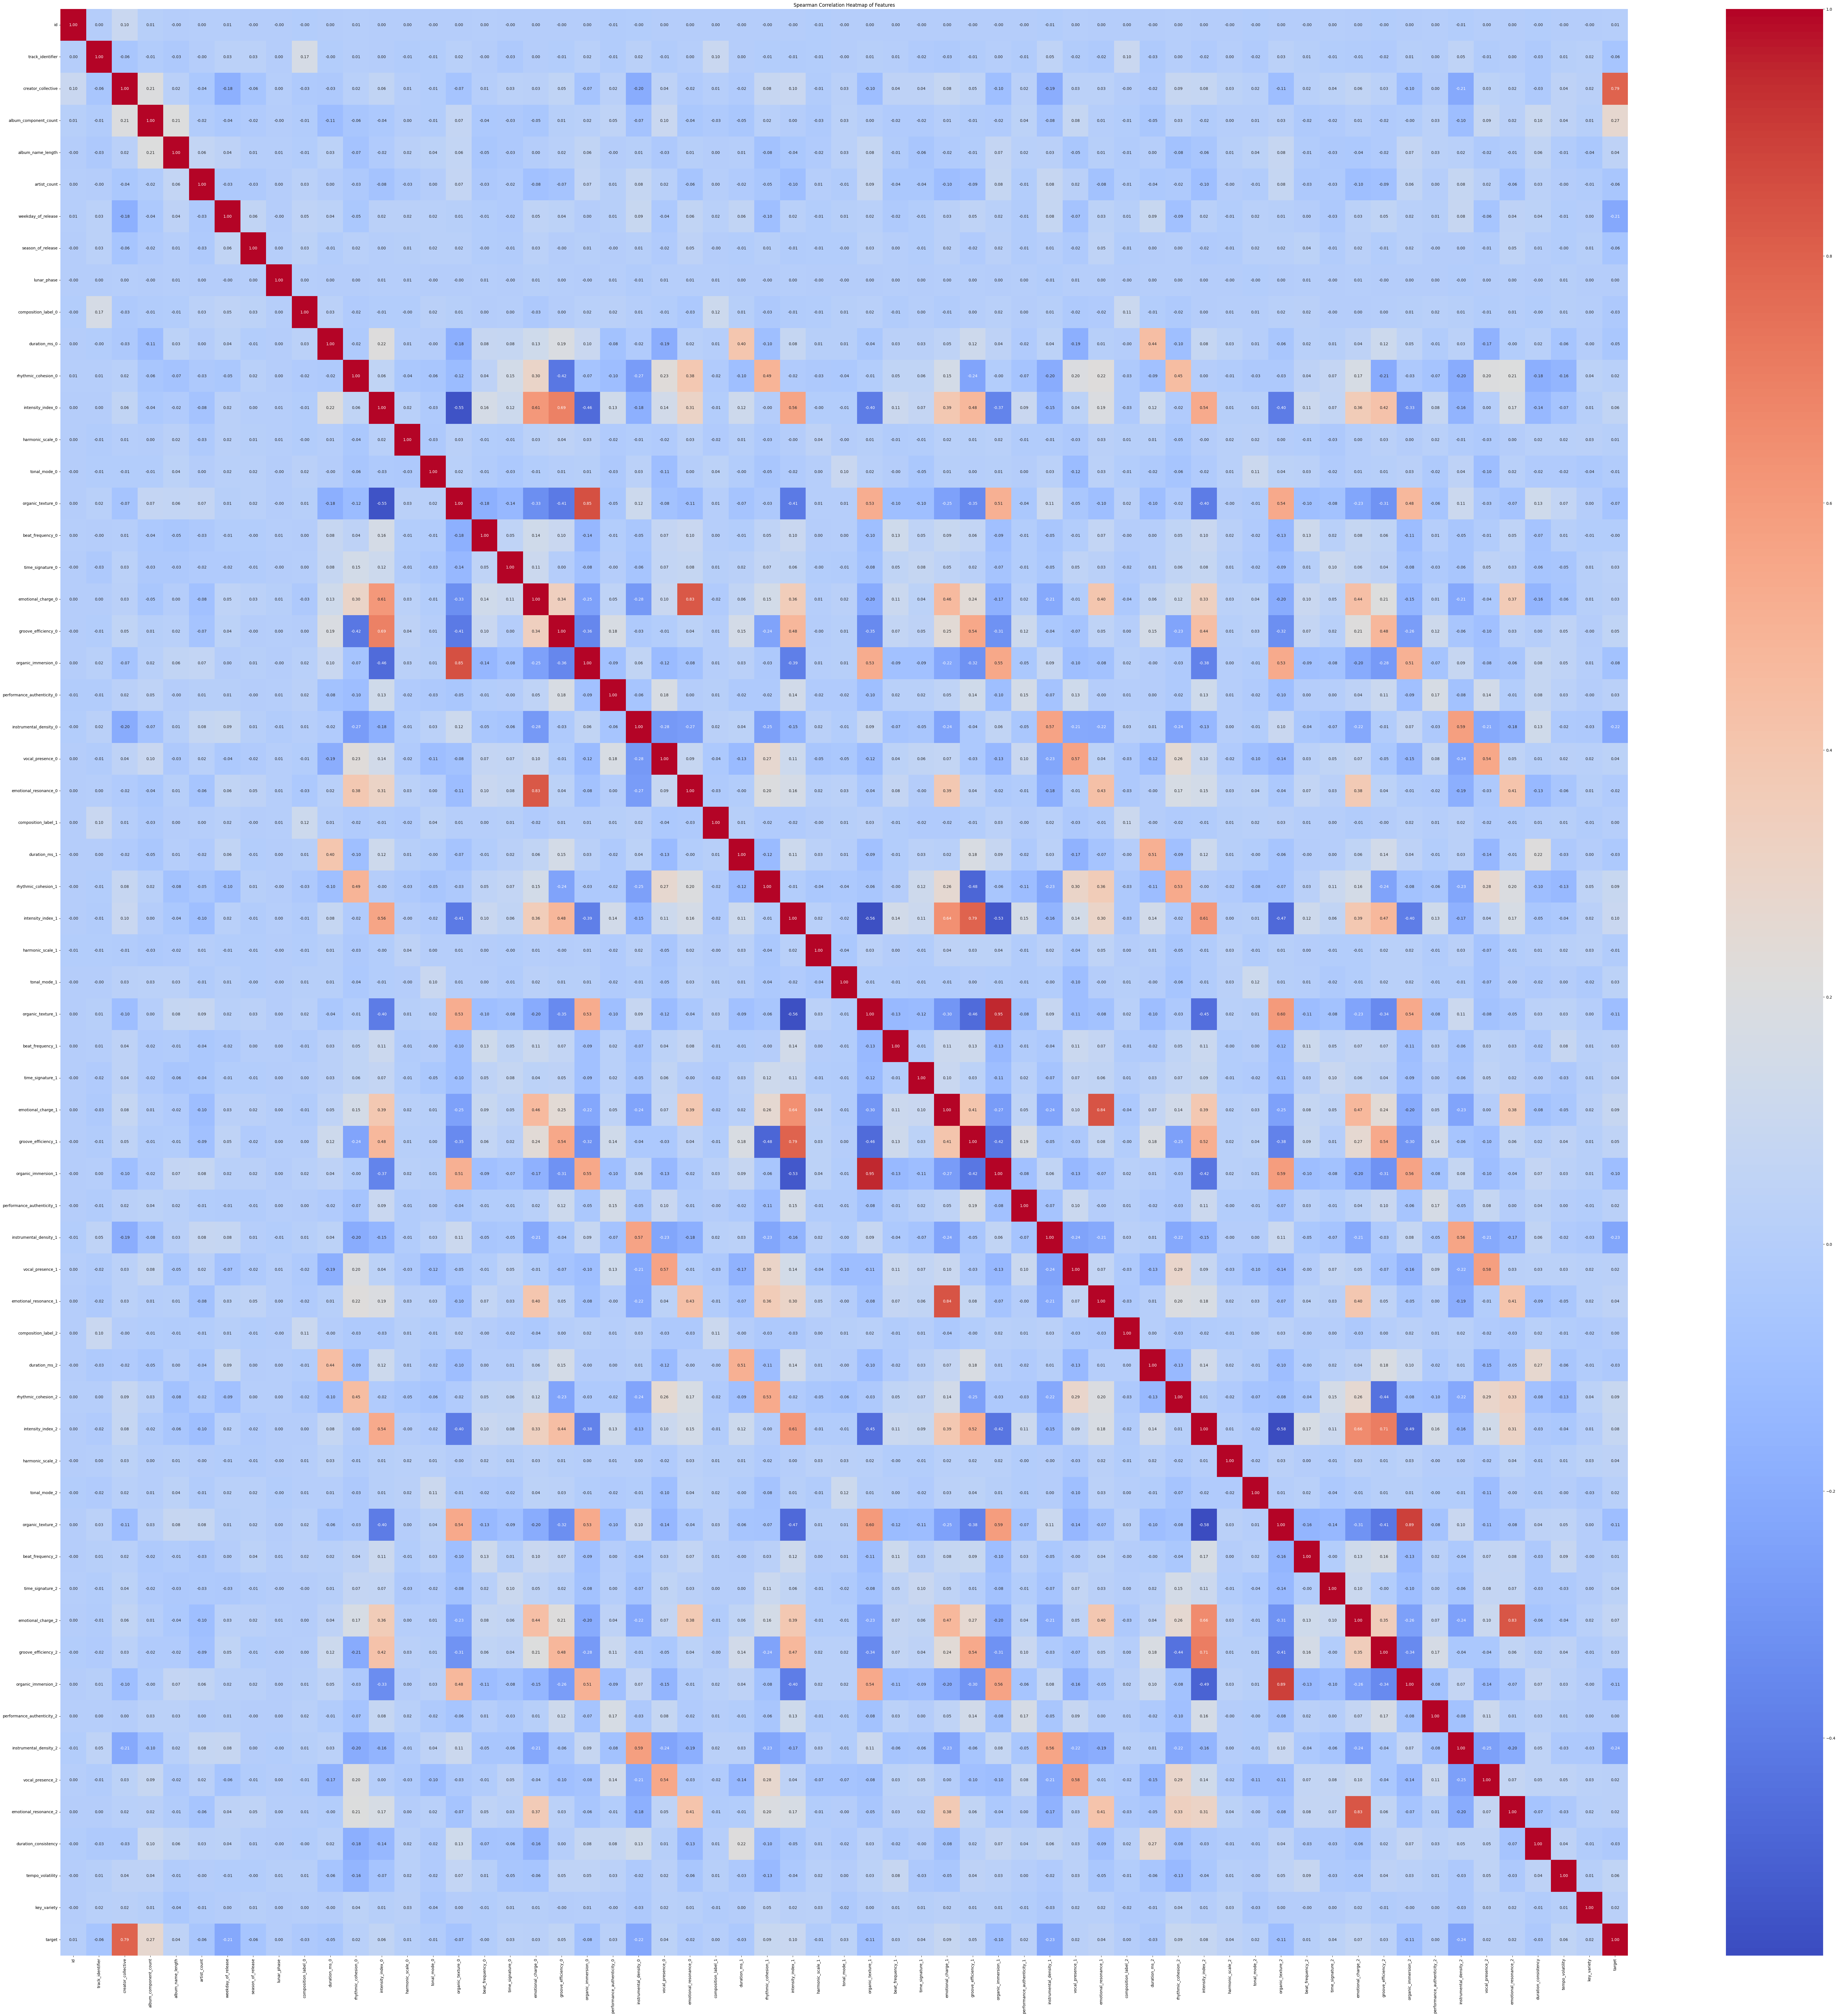

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

df_num= df.drop(columns=['publication_timestamp'])

plt.figure(figsize=(90, 90))
sns.heatmap(df_num.corr(method='spearman'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Spearman Correlation Heatmap of Features")
plt.show()

## Mutual Information Scores

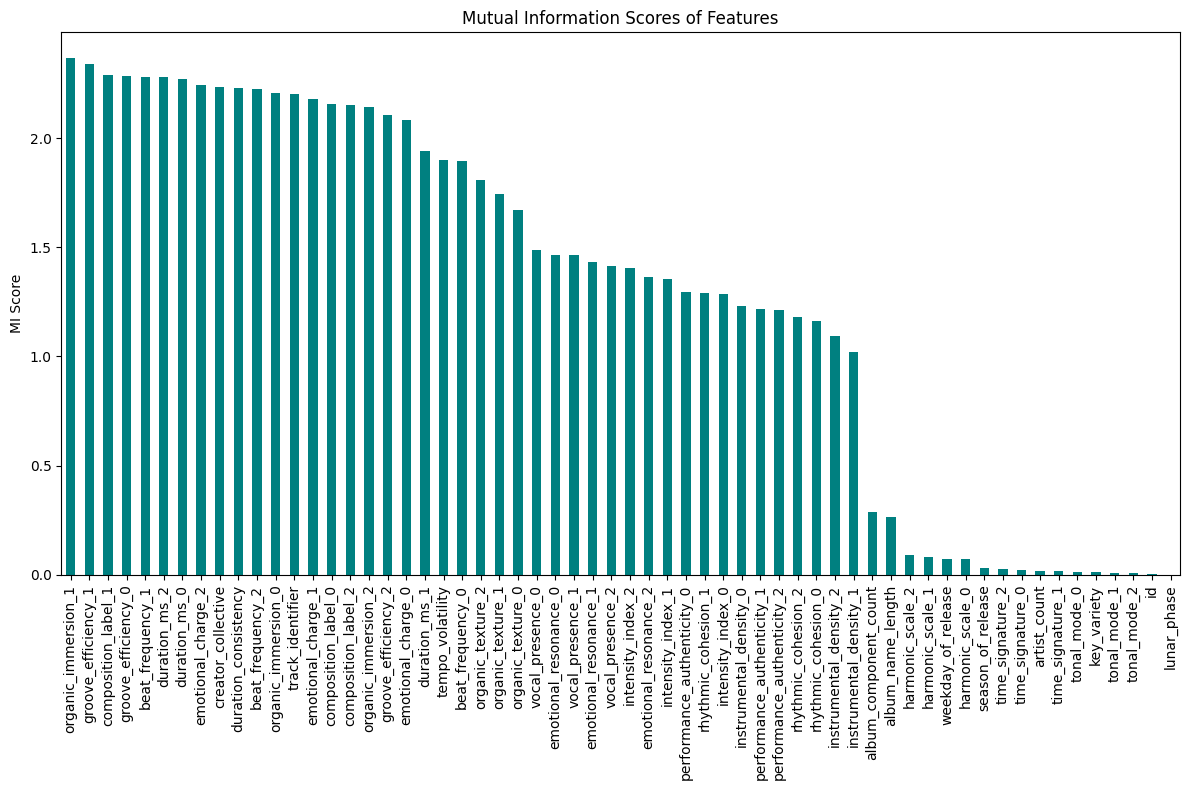

In [26]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt

# Define features and target
X = df_num.drop(columns=['target'])  # Replace 'target' with your actual target column name
y = df_num['target']

# Calculate MI scores
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
mi_series.plot(kind='bar', color='teal')
plt.title("Mutual Information Scores of Features")
plt.ylabel("MI Score")
plt.tight_layout()
plt.show()

In [27]:
df.drop(columns=['album_component_count', 'id', 'album_name_length',
                 'artist_count','key_variety',
                 'weekday_of_release','season_of_release', 'lunar_phase',
                 'harmonic_scale_0', 'harmonic_scale_1', 'harmonic_scale_2',
                 'time_signature_0', 'time_signature_1', 'time_signature_2',
                 'tonal_mode_0', 'tonal_mode_1', 'tonal_mode_2', 'publication_timestamp'
                ])

,track_identifier,creator_collective,composition_label_0,duration_ms_0,rhythmic_cohesion_0,intensity_index_0,organic_texture_0,beat_frequency_0,emotional_charge_0,groove_efficiency_0,...,emotional_charge_2,groove_efficiency_2,organic_immersion_2,performance_authenticity_2,instrumental_density_2,vocal_presence_2,emotional_resonance_2,duration_consistency,tempo_volatility,target
0,5018,74.000000,6023,154586.0,0.685000,0.789000,0.09900,95.992000,0.478923,1.150146,...,0.482850,1.450475,0.063601,0.1120,0.000000,0.032200,0.666,15204.423983,82.02700,74.0
1,4125,51.996884,23588,46874.0,0.523000,0.715000,0.00758,148.076000,0.559845,2.718967,...,0.267862,0.879147,0.686214,0.1720,0.000083,0.121905,0.361,45592.954911,22.11200,2.0
2,2827,51.996884,2826,264665.0,0.578358,0.604426,0.44500,124.738000,0.148544,1.270758,...,0.242606,0.912121,0.559969,0.0828,0.000000,0.328000,0.403,38309.603777,18.24200,35.0
3,25250,50.549653,11177,209208.0,0.597000,0.685000,0.02450,119.133973,0.252765,1.145485,...,0.426400,1.166430,0.611278,0.1560,0.000000,0.063000,0.520,13345.980827,46.26782,70.0
4,16056,78.000000,1288,215346.0,0.760000,0.856000,0.11300,118.006000,0.540136,1.124836,...,0.000000,1.450475,0.008668,0.0000,0.000000,0.000000,0.000,110199.561452,132.72200,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61604,2693,51.996884,11078,218490.0,0.648000,0.449000,0.36400,119.133973,0.172865,0.691834,...,0.261387,0.620458,2.043672,0.1220,0.000015,0.025500,0.567,23496.831574,46.26782,16.0
61605,10089,64.576923,17816,259746.0,0.578358,0.573000,0.41000,165.192000,0.269310,0.889752,...,0.585648,0.858621,1.213321,0.1240,0.000000,0.151000,0.784,48023.116399,42.21900,69.0
61606,27479,55.000000,1824,79093.0,0.831000,0.526000,0.57500,121.062000,0.301398,0.632212,...,0.112203,1.587209,0.958566,0.1190,0.870000,0.092200,0.137,52381.481480,46.26782,55.0
61607,9385,84.800000,10434,208906.0,0.448000,0.838000,0.21000,139.863000,0.212852,1.866370,...,0.438699,1.138848,0.081818,0.1020,0.000007,0.048300,0.569,16053.272612,44.47300,88.0


# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df= df.drop(columns=['album_component_count', 'id', 'album_name_length',
                 'artist_count','key_variety',
                 'weekday_of_release','season_of_release', 'lunar_phase',
                 'harmonic_scale_0', 'harmonic_scale_1', 'harmonic_scale_2',
                 'time_signature_0', 'time_signature_1', 'time_signature_2',
                 'tonal_mode_0', 'tonal_mode_1', 'tonal_mode_2', 'publication_timestamp'
                ])
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train only
X_test_scaled = scaler.transform(X_test) 

# Model Training: Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 12.642698987835667


# Model Training: XGBoost

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X and y are already prepared
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
   max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

model.fit(X_train, y_train, 
          eval_set=[(X_val, y_val)], 
          early_stopping_rounds=20, 
          verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [31]:
from sklearn.metrics import mean_squared_error

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 9.1633


## Hyperparameter Tuning

## GridSearchCV

In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Assuming X and y are already prepared
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

## RandomizedSearchCV

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the base model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for randomized search
param_dist = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Setup cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,  # Number of random combinations to try
    scoring='neg_root_mean_squared_error',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best RMSE Score (neg):", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 700, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Best RMSE Score (neg): -8.029512168293149


## XGBoost: After Hyperparameter Tuning

In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error, median_absolute_error)
import numpy as np

# Assuming X and y are already prepared
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=700,
    learning_rate=0.05,
    gamma= 0,
    max_depth=10,
    subsample=1.0,
    colsample_bytree=0.6,
    random_state=42,
    reg_alpha= 0.5,
    reg_lambda= 1.5,
    objective='reg:squarederror'
)

model.fit(X_train, y_train, 
          eval_set=[(X_val, y_val)], 
          early_stopping_rounds=20, 
          verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [47]:
# Custom SMAPE function
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# Prepare cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Storage for metrics
metrics = {
    "RMSE": [], "MAE": [], "R2": [],
    "MAPE": [], "SMAPE": [], "MedAE": []
}

# Cross-validation loop
for train_idx, val_idx in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train_fold, y_train_fold)
    preds = model.predict(X_val_fold)

    # Evaluate metrics
    metrics["RMSE"].append(np.sqrt(mean_squared_error(y_val_fold, preds)))
    metrics["MAE"].append(mean_absolute_error(y_val_fold, preds))
    metrics["R2"].append(r2_score(y_val_fold, preds))
    metrics["MAPE"].append(mean_absolute_percentage_error(y_val_fold, preds))
    metrics["SMAPE"].append(smape(y_val_fold.values, preds))
    metrics["MedAE"].append(median_absolute_error(y_val_fold, preds))

# Final results
print("\nCross-Validation Metrics:")
for name, values in metrics.items():
    print(f"{name}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}")


Cross-Validation Metrics:
RMSE: Mean = 8.0295, Std = 0.0527
MAE: Mean = 4.0727, Std = 0.0302
R2: Mean = 0.8614, Std = 0.0017
MAPE: Mean = 0.3565, Std = 0.0180
SMAPE: Mean = 13.5164, Std = 0.1255
MedAE: Mean = 1.1832, Std = 0.0172


# Model Training: CatBoost

In [37]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are already prepared
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    subsample=0.8,
    random_state=42,
    loss_function='RMSE',
    verbose=False
)

model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=20
)


In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

## Hyperparameter Tuning

In [39]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming X and y are already prepared
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

cat = CatBoostRegressor(verbose=0, random_state=42)

param_grid = {
    'iterations': [300, 500],
    'learning_rate': [0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=cat,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

## CatBoost: After Hyperparameter Tuning

In [40]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are already prepared
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=8,
    subsample=1.0,
    random_state=42,
    loss_function='RMSE',
    verbose=False
)

model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=20
)


In [41]:
# Custom SMAPE function
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# Prepare cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Storage for metrics
metrics = {
    "RMSE": [], "MAE": [], "R2": [],
    "MAPE": [], "SMAPE": [], "MedAE": []
}

# Cross-validation loop
for train_idx, val_idx in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train_fold, y_train_fold)
    preds = model.predict(X_val_fold)

    # Evaluate metrics
    metrics["RMSE"].append(np.sqrt(mean_squared_error(y_val_fold, preds)))
    metrics["MAE"].append(mean_absolute_error(y_val_fold, preds))
    metrics["R2"].append(r2_score(y_val_fold, preds))
    metrics["MAPE"].append(mean_absolute_percentage_error(y_val_fold, preds))
    metrics["SMAPE"].append(smape(y_val_fold.values, preds))
    metrics["MedAE"].append(median_absolute_error(y_val_fold, preds))

# Final results
print("\nCross-Validation Metrics:")
for name, values in metrics.items():
    print(f"{name}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}")


Cross-Validation Metrics:
RMSE: Mean = 9.0011, Std = 0.0602
MAE: Mean = 5.1106, Std = 0.0255
R2: Mean = 0.8258, Std = 0.0022
MAPE: Mean = 0.3709, Std = 0.0192
SMAPE: Mean = 14.9517, Std = 0.2114
MedAE: Mean = 2.0433, Std = 0.0293


In [48]:
from sklearn.metrics import mean_squared_error

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 1.4797


# Predictions on Test Set

In [49]:
test_predictions = model.predict(test[X_train.columns])
test["target"] = test_predictions
submission = test[["id", "target"]]
submission.to_csv("submission.csv", index=False)

In [50]:
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
